# Bitcoin-Price-Prediction

To Predict the Price of Bitcoin using Linear Regression Model.

## Importing Required Python Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [91]:
df= pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [92]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [76]:
df.loc[1023]['btc_market_price']

13.6888

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [98]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


## Data Cleaning & Filling

In [141]:
df.replace([np.inf, -np.inf], np.nan, inplace= True)

In [142]:
df.fillna(value= df.mean(), inplace= True)

In [143]:
df=df.drop_duplicates()

In [144]:
df.isnull().head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


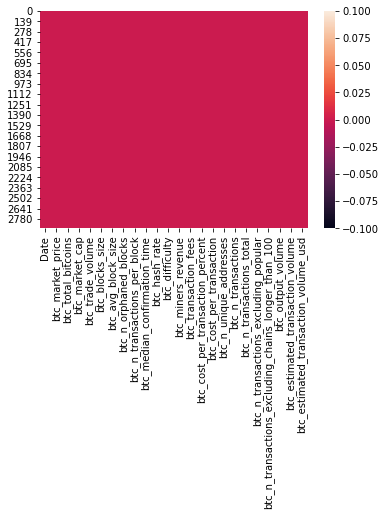

In [145]:
sns.heatmap(df.isnull())

## Data Visualisation

In [146]:
# Considering Effective Factors Only.


pf= df[['btc_market_price','btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]

In [147]:
pf.head()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


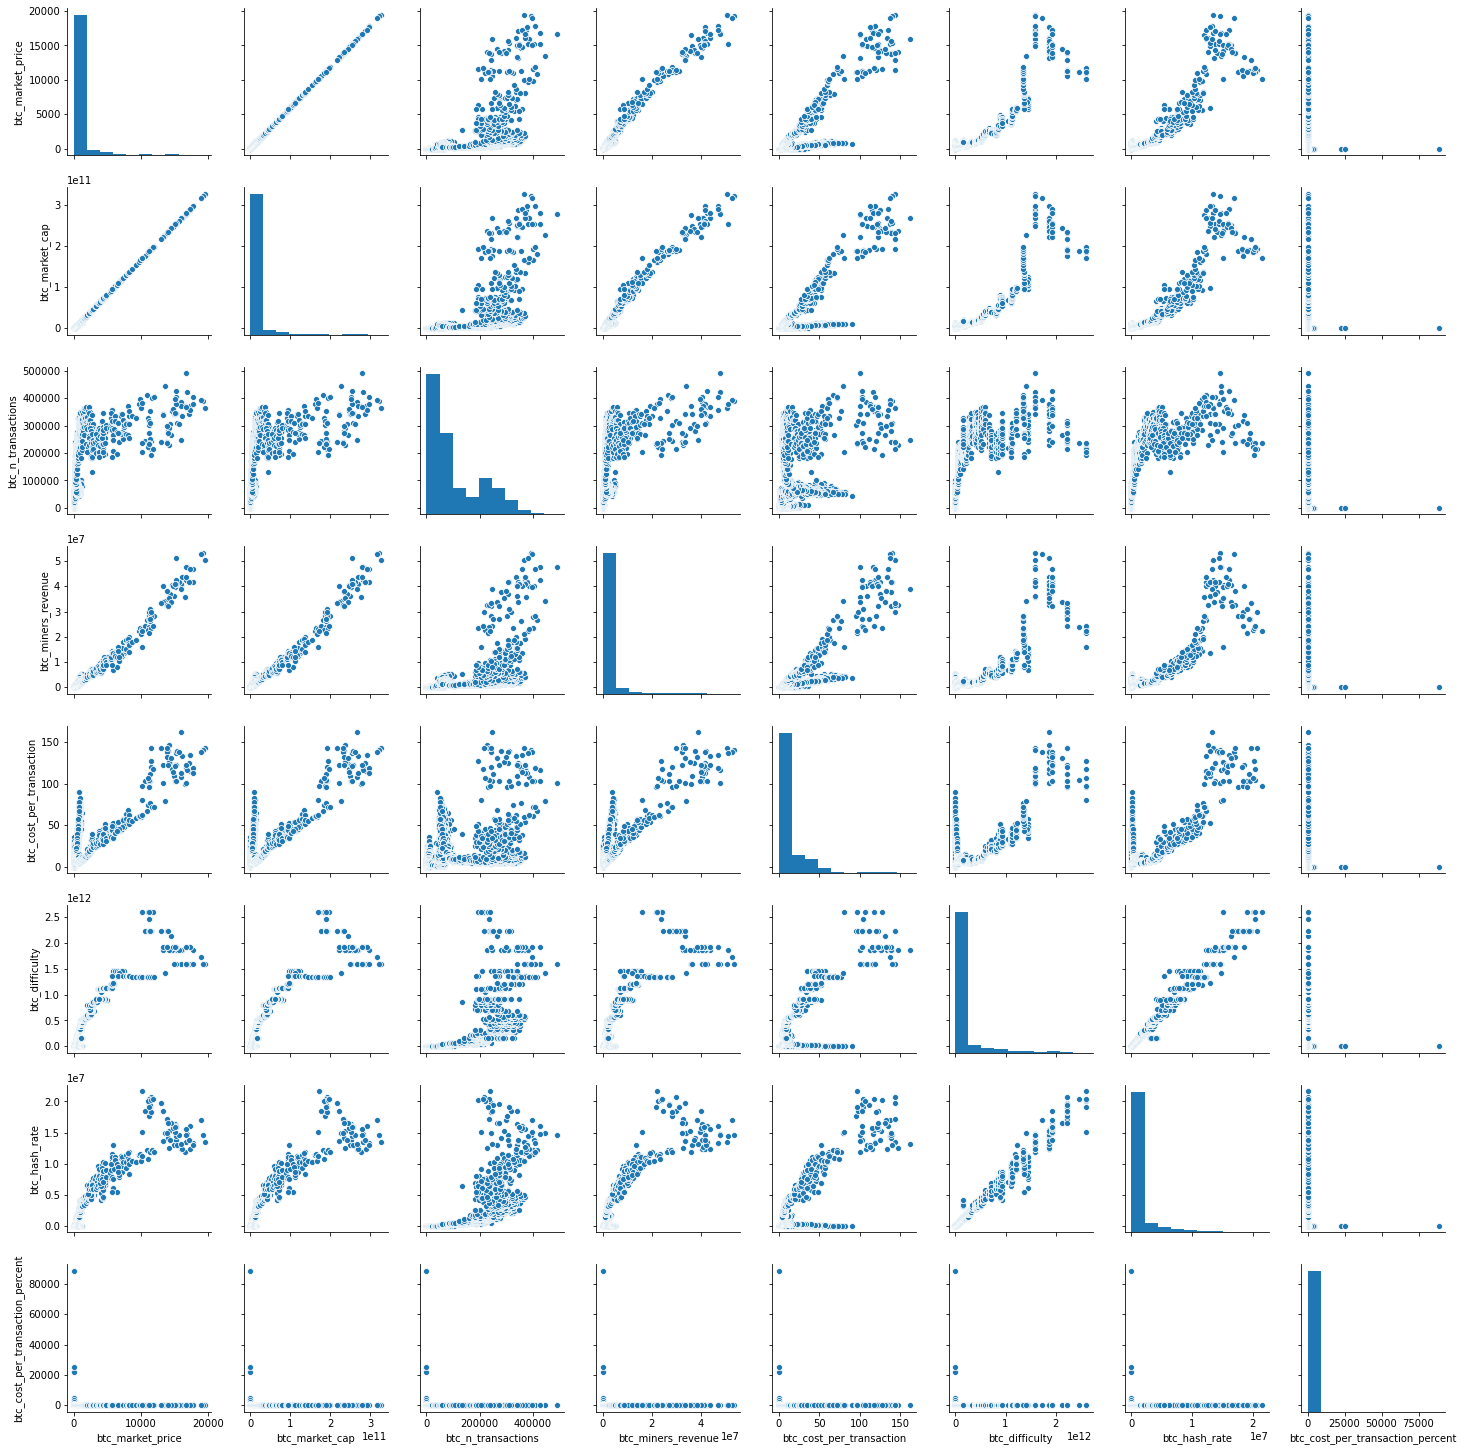

In [171]:
sns.pairplot(pf, palette='coolwarm')

In [149]:
pf.corr()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
btc_market_price,1.000000,0.999783,0.569603,0.986732,0.815507,0.916913,0.920876,-0.013517
btc_market_cap,0.999783,1.000000,0.566857,0.985417,0.805645,0.918041,0.922073,-0.012923
btc_n_transactions,0.569603,0.566857,1.000000,0.540910,0.347909,0.698436,0.699357,-0.036311
btc_miners_revenue,0.986732,0.985417,0.540910,1.000000,0.846861,0.863682,0.879517,-0.014251
btc_cost_per_transaction,0.815507,0.805645,0.347909,0.846861,1.000000,0.686990,0.695143,-0.025573
btc_difficulty,0.916913,0.918041,0.698436,0.863682,0.686990,1.000000,0.988458,-0.016129
btc_hash_rate,0.920876,0.922073,0.699357,0.879517,0.695143,0.988458,1.000000,-0.015868
btc_cost_per_transaction_percent,-0.013517,-0.012923,-0.036311,-0.014251,-0.025573,-0.016129,-0.015868,1.000000


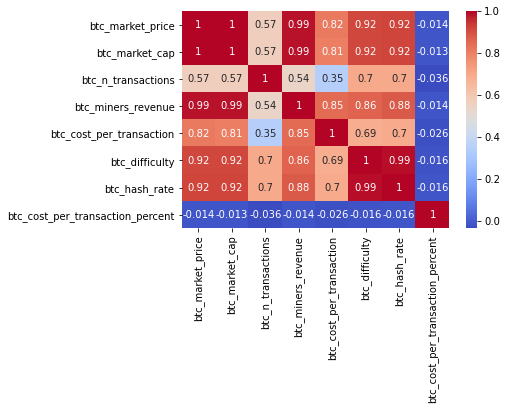

In [150]:
sns.heatmap(pf.corr(),annot=True,cmap='coolwarm')

## Applying Linear Regression Model to the dataset

In [151]:
X= pf[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]

In [152]:
Y= pf['btc_market_price']

In [159]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.4, random_state= 101)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lm= LinearRegression()

In [162]:
lm.fit(X_train, Y_train)

LinearRegression()

In [163]:
print('coefficients: \n',lm.coef_ )

coefficients: 
 [ 5.94353454e-08  3.00135962e-04 -6.90844795e-06  3.64521665e+00
 -3.02696425e-11 -8.82435307e-06  1.23854627e-03]


## Making Prediction

In [164]:
predictions= lm.predict(X_test)

In [165]:
predictions

array([ 9.04353565e-02, -3.10972216e+00,  3.40557732e+02, ...,
        3.43728514e+02,  3.76427365e+01,  2.07790436e+01])

In [166]:
Y_test

416        0.767600
300        0.230000
2098     329.320000
2411     603.885400
2073     273.950000
           ...     
2604    1133.079314
2453     704.790900
1737     361.700000
263        0.499999
696        6.750000
Name: btc_market_price, Length: 1163, dtype: float64

## Plotting Prediction Curve

Text(0, 0.5, 'Predicted Y')

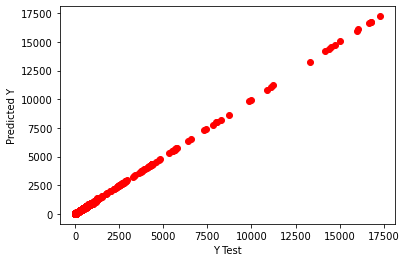

In [167]:
plt.scatter(Y_test, predictions, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,predictions))
print('MSE:', metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 12.676931528887035
MSE: 382.90717257445147
RMSE: 19.568014017126302


## Residual Data Curve

Text(0.5, 1.0, 'Residuals Distribution')

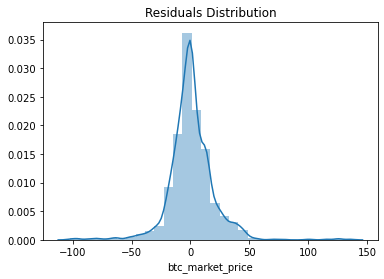

In [169]:
sns.distplot(Y_test-predictions, bins= 30)
plt.title('Residuals Distribution')

## Conclusion

In [80]:
coefficients= pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['coeffecient']
coefficients

,coeffecient
btc_market_cap,5.943535e-08
btc_n_transactions,3.001360e-04
btc_miners_revenue,-6.908448e-06
btc_cost_per_transaction,3.645217e+00
btc_difficulty,-3.026964e-11
btc_hash_rate,-8.824353e-06
btc_cost_per_transaction_percent,1.238546e-03


### Interpreting the coefficients:

*Holding all other features fixed, a 1 unit increase in btc_market_cap is associated with an increase of 5.943535e-08 btc_market_price. .

*Holding all other features fixed, a 1 unit increase in btc_n_transactions is associated with an increase of 3.001360e-04 btc_market_price.

*Holding all other features fixed, a 1 unit increase in btc_miners_revenue is associated with an decrease of 6.908448e-06 btc_market_price.

*Holding all other features fixed, a 1 unit increase in btc_cost_per_transaction is associated with an increase of 3.645217e+00 btc_market_price.

*Holding all other features fixed, a 1 unit increase in btc_difficulty is associated with an decrease of 3.026964e-11 btc_market_price.

*Holding all other features fixed, a 1 unit increase in btc_hash_rate is associated with a decrease of 8.824353e-06 btc_market_price.

*Holding all other features fixed, a 1 unit increase in btc_cost_per_transaction_percent is associated with an increase of 1.238546e-03 btc_market_price.